A partir del trabajo de https://github.com/PacktPublishing/Hands-On-Data-Science-for-Marketing

Comprender cuál es el valor de por vida del cliente ( CLV ) para los clientes individuales puede ayudar a los especialistas en marketing a justificar su presupuesto de marketing, así como a dirigirse a clientes potenciales de alto valor. 
El CLV mide el valor total de los clientes para la empresa a lo largo de su relación de por vida con la empresa. Es especialmente importante realizar un seguimiento de esta métrica para adquirir nuevos clientes. Por lo general, es más caro adquirir nuevos clientes que mantener los clientes existentes, por lo que conocer el valor de por vida y los costos asociados con la adquisición de nuevos clientes es esencial para construir estrategias de marketing con un ROI positivo. Por ejemplo, si el CLV promedio de su cliente es de $ 100 y solo cuesta $ 10 adquirir un nuevo cliente, entonces su negocio generará más ingresos a medida que adquiera nuevos clientes.


Sin embargo, si cuesta $ 150 adquirir un nuevo cliente y el CLV promedio de su cliente sigue siendo de $ 100, entonces perderá dinero por cada adquisición. En pocas palabras, si su gasto en marketing para la adquisición de nuevos clientes excede el CLV, perderá dinero por cada adquisición y es mejor trabajar con los clientes existentes.
Una forma de estimar la vida útil de un cliente es observar la tasa de abandono mensual promedio, que es el porcentaje de clientes que abandonan y terminan la relación con su empresa. Puede estimar la vida útil de un cliente dividiendo uno por la tasa de abandono. Suponiendo el 5% de la tasa de abandono en nuestro caso hipotético, la vida útil estimada del cliente es de 20 años. Dado el valor promedio mensual del cliente de $ 500 y la vida útil de 20 años, el CLV de este cliente resulta ser de $ 120,000. Este monto final de CLV se calcula multiplicando $ 500, el valor promedio por mes, por 12 meses y el período de vida útil de 20 años.

Debido a que normalmente no conocemos la vida útil de los clientes, a menudo tratamos de estimar el CLV en el transcurso de un período determinado. Se puede hacer estimando el CLV de 12 meses de un cliente, el CLV de 24 meses o también puede ser un CLV de 3 meses. Aparte del método que discutimos a través de un ejemplo, el CLV también se puede estimar mediante la construcción de modelos predictivos. Mediante el uso de algoritmos de aprendizaje automático y los datos del historial de compras de los clientes, podemos crear modelos de aprendizaje automático que predicen el CLV de los clientes en el transcurso de un período determinado.

cuatro metodologías utilizadas comúnmente para evaluar la regresión modelos- error cuadrático medio ( MSE ), mediana de error absoluto ( MAE ), R 2 , y predijo frente gráfico de dispersión real. Como sugiere el nombre, MSE mide el promedio de los errores al cuadrado, donde los errores son las diferencias entre los valores predichos y reales. La ecuación para MSE tiene el siguiente aspecto:

Los valores de Y en esta ecuación son los valores reales y los valores de Y '  son los valores predichos. Debido a que MSE es un promedio de errores cuadrados, esta medida es sensible y muy afectada por valores atípicos. 

El MAE, por otro lado, es menos sensible a los valores atípicos y se considera más robusto, ya que la mediana se ve afectada por los valores atípicos o los valores en las colas finales mucho menos que el promedio.

Los valores de y en esta ecuación representan los valores reales y los  valores representan los valores predichos.

Otra medida de uso frecuente para los modelos de regresión es R^2 , también llamado coeficiente de determinación. R^2 mide la bondad del ajuste. En otras palabras, mide qué tan bien se ajusta un modelo de regresión a los datos. En pocas palabras, es el porcentaje de la variabilidad explicada de la variable objetivo por el modelo de regresión.



In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

UTILIZAR ESTA PARTE SI ESTAS EN GOOGLE COLAB

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import os

In [ ]:
RETAIL_PATH = "https://github.com/hcgalvan/UNSAM-Machine-Learning-on-Economics/raw/main/data/"

In [ ]:
if 'google.colab' in sys.modules:
  def load_datasets_h1(datasets_path=RETAIL_PATH):
    #retail_ol_h1 = pd.read_csv('./data/Year 2009-2010_train.csv',  encoding= 'unicode_escape')
    # retail_ol_h2 = pd.read_csv('./data/Year 2010-2011_train.csv',  encoding= 'unicode_escape')
    csv_path = os.path.join(datasets_path, "Year 2009-2010_train.csv")
    return pd.read_csv(csv_path, encoding= 'unicode_escape')

  # The function loads the data as a Pandas DataFrame instance.
  retail_ol_h1 = load_datasets_h1()
  def load_datasets_h2(datasets_path=RETAIL_PATH):
      #xlsx_path = os.path.join(datasets_path, "online_retail_II.xlsx")
      #return pd.read_excel(xlsx_path,1)
      csv_path = os.path.join(datasets_path, "Year 2010-2011_train.csv")
      return pd.read_csv(csv_path, encoding= 'unicode_escape')

  # The function loads the data as a Pandas DataFrame instance.
  retail_ol_h2 = load_datasets_h2()

# 1. Load Data

UTILIZAR ESTE PARTE DEL CODIGO SOLO SI DESCARGASTE EN PC

In [3]:
# Loading online retailer data
# onlineRetailer_df = pd.read_csv('online_retail_II.csv', encoding= 'ISO-8859-1')
#retail_ol_h1= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2010-2011')
#retail_ol_h2= pd.read_excel(io='./data/online_retail_II.xlsx', sheet_name='Year 2009-2010')
retail_ol_h1 = pd.read_csv('./data/Year 2009-2010_train.csv',  encoding= 'unicode_escape')
retail_ol_h2 = pd.read_csv('./data/Year 2010-2011_train.csv',  encoding= 'unicode_escape')

LO QUE SIGUE ES PARTE COMUN.
Para trabajar en googlecolab como para los que hemos descargado en PC.

In [4]:
frames = [retail_ol_h1, retail_ol_h2]
results = pd.concat(frames)
df = results.copy()

In [5]:
df.shape

(1067371, 8)

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

#### - Cantidades Negativos

In [7]:
df.loc[df['Quantity'] <= 0].shape

(22950, 8)

In [8]:
df.shape

(1067371, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]

In [10]:
df.shape

(1044421, 8)

#### - Registros sin Customer ID

In [11]:
pd.isnull(df['Customer ID']).sum()

238801

In [12]:
df.shape

(1044421, 8)

In [13]:
df = df[pd.notnull(df['Customer ID'])]

In [14]:
df.shape

(805620, 8)

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [16]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2009-12-01 07:45:00 ~ 2011-12-09 12:50:00


In [17]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17305, 8)

In [18]:
df.shape

(805620, 8)

In [19]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [20]:
df.shape

(788315, 8)

#### - Total Sales

In [21]:
df['Sales'] = df['Quantity'] * df['Price']

In [22]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Order Data

In [23]:
orders_df = df.groupby(['Customer ID', 'Invoice']).agg({
    'Sales': sum,
    'InvoiceDate': max
})

In [24]:
orders_df

Sales         InvoiceDate
Customer ID Invoice                             
12346.0     491725     45.00 2009-12-14 08:34:00
            491742     22.50 2009-12-14 11:00:00
            491744     22.50 2009-12-14 11:02:00
            492718     22.50 2009-12-18 10:47:00
            492722      1.00 2009-12-18 10:55:00
...                      ...                 ...
18287.0     523290     30.60 2010-09-21 12:19:00
            534346    381.50 2010-11-22 11:51:00
            554065    765.28 2011-05-22 10:39:00
            570715   1001.32 2011-10-12 10:23:00
            573167     70.68 2011-10-28 09:29:00

[36197 rows x 2 columns]

# 3. Data Analysis

In [25]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [26]:
summary_df = orders_df.reset_index().groupby('Customer ID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [27]:
summary_df

Sales                                         \
                min       max       sum          avg count   
Customer ID                                                  
12346.0        1.00  77183.60  77556.46  6463.038333  12.0   
12347.0      382.52   1423.58   5408.50   772.642857   7.0   
12348.0      222.16    892.80   2019.40   403.880000   5.0   
12349.0      200.00   1757.55   4428.69  1107.172500   4.0   
12350.0      334.40    334.40    334.40   334.400000   1.0   
...             ...       ...       ...          ...   ...   
18283.0        1.95    313.65   2528.65   120.411905  21.0   
18284.0      461.68    461.68    461.68   461.680000   1.0   
18285.0      427.00    427.00    427.00   427.000000   1.0   
18286.0      462.95    833.48   1296.43   648.215000   2.0   
18287.0       30.60   1071.61   4182.99   597.570000   7.0   

                    InvoiceDate                                        \
                            min                 max purchase_duration   
Customer ID                                                             
12346.0     2009-12-14 08:34:00 2011-01-18 10:01:00               400   
12347.0     2010-10-31 14:20:00 2011-10-31 12:25:00               364   
12348.0     2010-09-27 14:59:00 2011-09-25 13:13:00               362   
12349.0     2010-04-29 13:20:00 2011-11-21 09:51:00               570   
12350.0     2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                         ...                 ...               ...   
18283.0     2010-02-19 17:16:00 2011-11-30 12:59:00               648   
18284.0     2010-10-04 11:33:00 2010-10-04 11:33:00                 0   
18285.0     2010-02-17 10:24:00 2010-02-17 10:24:00                 0   
18286.0     2009-12-16 10:45:00 2010-08-20 11:57:00               247   
18287.0     2010-05-17 11:55:00 2011-10-28 09:29:00               528   

                                
            purchase_frequency  
Customer ID                     
12346.0              33.333333  
12347.0              52.000000  
12348.0              72.400000  
12349.0             142.500000  
12350.0               0.000000  
...                        ...  
18283.0              30.857143  
18284.0               0.000000  
18285.0               0.000000  
18286.0             123.500000  
18287.0              75.428571  

[5853 rows x 9 columns]

In [28]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [29]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
Customer ID,,,,,,,,,
12346.0,1.00,77183.60,77556.46,6463.038333,12.0,2009-12-14 08:34:00,2011-01-18 10:01:00,400,33.333333
12347.0,382.52,1423.58,5408.50,772.642857,7.0,2010-10-31 14:20:00,2011-10-31 12:25:00,364,52.000000
12348.0,222.16,892.80,2019.40,403.880000,5.0,2010-09-27 14:59:00,2011-09-25 13:13:00,362,72.400000
12349.0,200.00,1757.55,4428.69,1107.172500,4.0,2010-04-29 13:20:00,2011-11-21 09:51:00,570,142.500000
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18283.0,1.95,313.65,2528.65,120.411905,21.0,2010-02-19 17:16:00,2011-11-30 12:59:00,648,30.857143
18284.0,461.68,461.68,461.68,461.680000,1.0,2010-10-04 11:33:00,2010-10-04 11:33:00,0,0.000000
18285.0,427.00,427.00,427.00,427.000000,1.0,2010-02-17 10:24:00,2010-02-17 10:24:00,0,0.000000


In [30]:
summary_df.shape

(5853, 9)

In [31]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [32]:
summary_df.shape

(4123, 9)

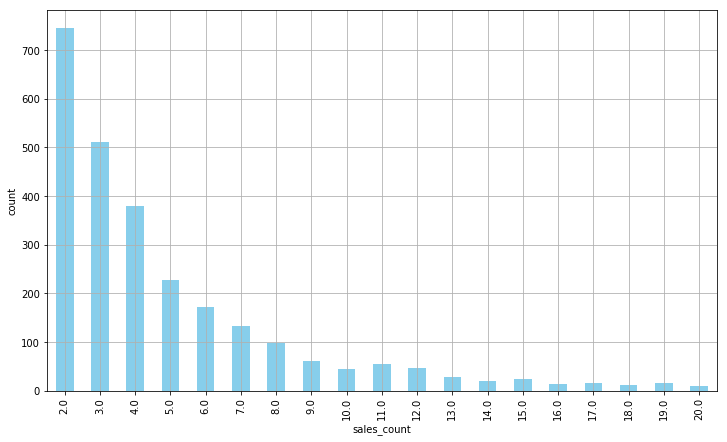

In [32]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

In [33]:
summary_df['sales_count'].describe()

count    4123.000000
mean        8.337618
std        14.707433
min         2.000000
25%         3.000000
50%         5.000000
75%         9.000000
max       389.000000
Name: sales_count, dtype: float64

In [34]:
summary_df['sales_avg'].describe()

count     4123.000000
mean       382.960414
std        437.566080
min          7.737500
25%        201.464667
50%        302.255000
75%        437.395667
max      14844.766667
Name: sales_avg, dtype: float64

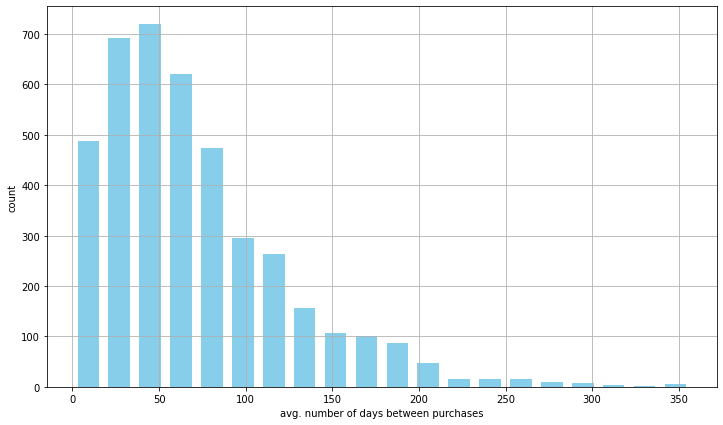

In [35]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [36]:
summary_df['invoicedate_purchase_frequency'].describe()

count    4123.000000
mean       70.508728
std        52.749721
min         0.250000
25%        32.450000
50%        58.000000
75%        94.791667
max       357.000000
Name: invoicedate_purchase_frequency, dtype: float64

In [37]:
summary_df['invoicedate_purchase_duration'].describe()

count    4123.000000
mean      380.960708
std       223.527109
min         1.000000
25%       181.000000
50%       385.000000
75%       586.000000
max       729.000000
Name: invoicedate_purchase_duration, dtype: float64

# 4. Predicting 3-Month CLV

## 4.1. Data Preparation

Dado que queremos predecir el valor del cliente de 3 meses, estamos desglosando los datos en partes de 3 meses para cada cliente. Como puede ver en la groupbyfunción, agrupamos el DataFrame previamente construido  orders_df por CustomerIDy un personalizado Grouper, que agrupa  InvoiceDatecada 3 meses. Luego, para cada grupo de ventanas de tiempo de 3 meses, sumamos todas las ventas para obtener el monto total de la compra, tomamos el promedio del monto de la compra y el número total de compras para el período dado para cada cliente. De esta forma tenemos datos agregados que tienen información de compra de cada cliente cada 3 meses. Por último, limpiamos los nombres de las columnas. 

In [38]:
clv_freq = '3M'

Para calcular el CLV, necesitamos conocer la frecuencia, actualidad y monto total de compras de cada cliente. Vamos a calcular información básica sobre el monto de compra promedio y de por vida de cada cliente, así como la duración y frecuencia de las compras de cada cliente.


In [39]:
data_df = orders_df.reset_index().groupby([
    'Customer ID',
    pd.Grouper(key='InvoiceDate', freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

Primero agrupamos por y , , , y  . La primera función, función calcula el número promedio de días entre pedidos dividiendo  por el número de pedidos.CustomerIDcolumna y agregue los números por columnas . Si observa de cerca las funciones de agregación , estamos usando cuatro funciones de agregación de clientes :,  simplemente calcula el promedio para cada grupo y la segunda función , simplemente cuenta el número de registros en cada grupo.

In [40]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [42]:
data_df = data_df.reset_index()

In [43]:
data_df.head(10)

,Customer ID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2009-12-31,113.50,22.700,5.0
1,12346.0,2010-03-31,117.05,23.410,5.0
2,12346.0,2010-06-30,142.31,142.310,1.0
3,12346.0,2011-03-31,77183.60,77183.600,1.0
4,12347.0,2010-12-31,2035.11,1017.555,2.0
5,12347.0,2011-03-31,475.39,475.390,1.0
6,12347.0,2011-06-30,1018.77,509.385,2.0
7,12347.0,2011-09-30,584.91,584.910,1.0
8,12347.0,2011-12-31,1294.32,1294.320,1.0
9,12348.0,2010-09-30,222.16,222.160,1.0


In [44]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [45]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [46]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5',
 '2010-09-30': 'M_6',
 '2010-06-30': 'M_7',
 '2010-03-31': 'M_8',
 '2009-12-31': 'M_9'}

In [47]:
data_df.head(10)

,Customer ID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2009-12-31,113.50,22.700,5.0,M_9
1,12346.0,2010-03-31,117.05,23.410,5.0,M_8
2,12346.0,2010-06-30,142.31,142.310,1.0,M_7
3,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
4,12347.0,2010-12-31,2035.11,1017.555,2.0,M_5
5,12347.0,2011-03-31,475.39,475.390,1.0,M_4
6,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
7,12347.0,2011-09-30,584.91,584.910,1.0,M_2
8,12347.0,2011-12-31,1294.32,1294.320,1.0,M_1
9,12348.0,2010-09-30,222.16,222.160,1.0,M_6


#### - Building Sample Set

Primero, dividiremos los datos en partes de 3 meses y tomaremos los datos de los últimos 3 meses como objetivo para las predicciones y el resto como características. Primero prepararemos nuestros datos para la construcción de modelos y luego entrenaremos un modelo de regresión lineal para las predicciones de valor del cliente de 3 meses.

In [48]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'], 
    values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='Customer ID'
)

In [49]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [50]:
features_df.shape

(5440, 24)

In [51]:
features_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,142.31,23.41,22.7,NaN,NaN,...,5.0,5.0,NaN,NaN,77183.60,NaN,NaN,142.31,117.05,113.5
12347.0,584.91,509.385,475.390,1017.555,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,584.91,1018.77,475.39,2035.11,NaN,NaN,NaN,NaN
12348.0,310.00,367.000,227.440,892.800,222.16,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,310.00,367.00,227.44,892.80,222.16,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,1402.620,NaN,634.26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1402.62,NaN,1268.52,NaN,NaN
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,334.40,NaN,NaN,NaN,NaN,NaN
12351.0,NaN,NaN,NaN,300.930,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,300.93,NaN,NaN,NaN,NaN
12352.0,316.25,NaN,312.362,171.900,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,632.50,NaN,1561.81,343.80,NaN,NaN,NaN,NaN
12353.0,NaN,89.000,NaN,317.760,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,89.00,NaN,317.76,NaN,NaN,NaN,NaN
12354.0,NaN,1079.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1079.40,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
features_df = features_df.fillna(0)

In [53]:
features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_count_M_8,sales_count_M_9,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,0.0,...,5.0,5.0,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5
12347.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,0.0,0.0,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0
12348.0,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,1.0,...,0.0,0.0,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0
12349.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0
12350.0,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0


In [55]:
response_df = data_df.loc[
    data_df['M'] == 'M_1',
    ['Customer ID', 'sales_sum']
]

In [62]:
response_df.columns = ['Customer ID', 'CLV_'+clv_freq]

In [63]:
response_df.shape

(2407, 2)

In [64]:
response_df.head(10)

,Customer ID,CLV_3M
8,12347.0,1294.32
16,12349.0,1757.55
22,12352.0,311.73
31,12356.0,58.35
33,12357.0,6207.67
44,12359.0,2876.85
50,12360.0,1043.78
59,12362.0,2119.85
63,12364.0,299.06
73,12370.0,739.28


In [65]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='Customer ID',
    how='left'
)

In [66]:
sample_set_df.shape

(5440, 26)

In [67]:
sample_set_df.head(10)

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,Customer ID,CLV_3M
NaN,0.00,0.000,77183.600,0.000,0.00,142.31,23.41,22.7,0.0,0.0,...,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,12346.0,NaN
8.0,584.91,509.385,475.390,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,12347.0,1294.32
NaN,310.00,367.000,227.440,892.800,222.16,0.00,0.00,0.0,1.0,1.0,...,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,12348.0,NaN
16.0,0.00,0.000,0.000,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,12349.0,1757.55
NaN,0.00,0.000,334.400,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,12350.0,NaN
NaN,0.00,0.000,0.000,300.930,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,300.93,0.00,0.00,0.00,0.0,12351.0,NaN
22.0,316.25,0.000,312.362,171.900,0.00,0.00,0.00,0.0,2.0,0.0,...,632.50,0.00,1561.81,343.80,0.00,0.00,0.00,0.0,12352.0,311.73
NaN,0.00,89.000,0.000,317.760,0.00,0.00,0.00,0.0,0.0,1.0,...,0.00,89.00,0.00,317.76,0.00,0.00,0.00,0.0,12353.0,NaN
NaN,0.00,1079.400,0.000,0.000,0.00,0.00,0.00,0.0,0.0,1.0,...,0.00,1079.40,0.00,0.00,0.00,0.00,0.00,0.0,12354.0,NaN
NaN,0.00,459.400,0.000,0.000,0.00,488.21,0.00,0.0,0.0,1.0,...,0.00,459.40,0.00,0.00,0.00,488.21,0.00,0.0,12355.0,NaN


In [68]:
sample_set_df = sample_set_df.fillna(0)

In [69]:
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_avg_M_6,sales_avg_M_7,sales_avg_M_8,sales_avg_M_9,sales_count_M_2,sales_count_M_3,...,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_6,sales_sum_M_7,sales_sum_M_8,sales_sum_M_9,Customer ID,CLV_3M
NaN,0.00,0.000,77183.60,0.000,0.00,142.31,23.41,22.7,0.0,0.0,...,0.00,0.00,77183.60,0.00,0.00,142.31,117.05,113.5,12346.0,0.00
8.0,584.91,509.385,475.39,1017.555,0.00,0.00,0.00,0.0,1.0,2.0,...,584.91,1018.77,475.39,2035.11,0.00,0.00,0.00,0.0,12347.0,1294.32
NaN,310.00,367.000,227.44,892.800,222.16,0.00,0.00,0.0,1.0,1.0,...,310.00,367.00,227.44,892.80,222.16,0.00,0.00,0.0,12348.0,0.00
16.0,0.00,0.000,0.00,1402.620,0.00,634.26,0.00,0.0,0.0,0.0,...,0.00,0.00,0.00,1402.62,0.00,1268.52,0.00,0.0,12349.0,1757.55
NaN,0.00,0.000,334.40,0.000,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.00,334.40,0.00,0.00,0.00,0.00,0.0,12350.0,0.00


In [70]:
sample_set_df['CLV_'+clv_freq].describe()

count     5440.000000
mean       363.488903
std       1951.514705
min          0.000000
25%          0.000000
50%          0.000000
75%        307.165000
max      68012.350000
Name: CLV_3M, dtype: float64

## 4.2. Regression Models

Tambien es importante experimentar con otros algoritmos de aprendizaje automático, como el bosque aleatorio y la máquina de vectores de soporte ( SVM ).

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
target_var = 'CLV_'+clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['Customer ID', target_var]]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_set_df[all_features], 
    sample_set_df[target_var], 
    test_size=0.3
)

#### - Linear Regression Model

In [74]:
from sklearn.linear_model import LinearRegression

# Try these models as well
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [75]:
reg_fit = LinearRegression()

In [76]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [77]:
reg_fit.intercept_

113.54124055545208

In [78]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-0.332199
1,sales_avg_M_3,-0.129334
2,sales_avg_M_4,-0.187433
3,sales_avg_M_5,-0.483613
4,sales_avg_M_6,0.179491
5,sales_avg_M_7,-0.092357
6,sales_avg_M_8,0.643914
7,sales_avg_M_9,-0.326183
8,sales_count_M_2,-50.355423
9,sales_count_M_3,23.147519


## 4.3. Evaluation

In [79]:
from sklearn.metrics import r2_score, median_absolute_error

In [80]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

#### - R-Squared

In [81]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))

In-Sample R-Squared: 0.7787
Out-of-Sample R-Squared: 0.2604


#### - Median Absolute Error

In [82]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))

In-Sample MSE: 146.6355
Out-of-Sample MSE: 162.0176


#### - Scatter Plot

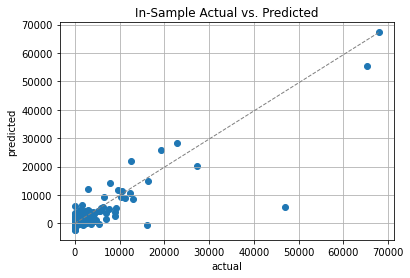

In [83]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()

plt.show()

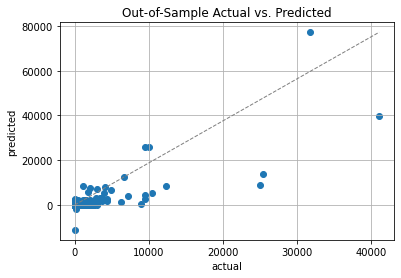

In [84]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()